<a href="https://colab.research.google.com/github/madliners/datik/blob/main/Tugas_12_Pamela_Rizqi_Maharani_1201220060_TI_46_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload ()

Saving drug200-HDG.csv to drug200-HDG (1).csv


{'drug200-HDG (1).csv': b'Age,Sex,BP,Cholesterol,Na_to_K,Drug\r23,F,HIGH,HIGH,25.355,drugY\r47,M,LOW,HIGH,13.093,drugC\r47,M,LOW,HIGH,10.114,drugC\r28,F,NORMAL,HIGH,7.798,drugX\r61,F,LOW,HIGH,18.043,drugY\r22,F,NORMAL,HIGH,8.607,drugX\r49,F,NORMAL,HIGH,16.275,drugY\r41,M,LOW,HIGH,11.037,drugC\r60,M,NORMAL,HIGH,15.171,drugY\r43,M,LOW,NORMAL,19.368,drugY\r47,F,LOW,HIGH,11.767,drugC\r34,F,HIGH,NORMAL,19.199,drugY\r43,M,LOW,HIGH,15.376,drugY\r74,F,LOW,HIGH,20.942,drugY\r50,F,NORMAL,HIGH,12.703,drugX\r16,F,HIGH,NORMAL,15.516,drugY\r69,M,LOW,NORMAL,11.455,drugX\r43,M,HIGH,HIGH,13.972,drugA\r23,M,LOW,HIGH,7.298,drugC\r32,F,HIGH,NORMAL,25.974,drugY\r57,M,LOW,NORMAL,19.128,drugY\r63,M,NORMAL,HIGH,25.917,drugY\r47,M,LOW,NORMAL,30.568,drugY\r48,F,LOW,HIGH,15.036,drugY\r33,F,LOW,HIGH,33.486,drugY\r28,F,HIGH,NORMAL,18.809,drugY\r31,M,HIGH,HIGH,30.366,drugY\r49,F,NORMAL,NORMAL,9.381,drugX\r39,F,LOW,NORMAL,22.697,drugY\r45,M,LOW,HIGH,17.951,drugY\r18,F,NORMAL,NORMAL,8.75,drugX\r74,M,HIGH,HIGH,9.567,d

In [ ]:
df=pd.read_csv('drug200-HDG.csv')
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df.isna()
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
col_names = ['Age','Sex','BP','Cholesterol','Na_to_K','Drug']
for col in col_names:
  print(df[col].value_counts())

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64
Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Na_to_K
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: count, Length: 198, dtype: int64
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [ ]:
from sklearn import preprocessing
le_sx=preprocessing.LabelEncoder()
le_sx.fit(['M','F'])
df['Sex']=le_sx.transform(df['Sex'])

In [ ]:
le_bp=preprocessing.LabelEncoder()
le_bp.fit(['HIGH','LOW','NORMAL'])
df['BP']=le_bp.transform(df['BP'])

In [ ]:
le_cs=preprocessing.LabelEncoder()
le_cs.fit(['HIGH','NORMAL'])
df['Cholesterol']=le_cs.transform(df['Cholesterol'])

In [ ]:
print (df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   0            0   25.355  drugY
1     47    1   1            0   13.093  drugC
2     47    1   1            0   10.114  drugC
3     28    0   2            0    7.798  drugX
4     61    0   1            0   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            0   11.567  drugC
196   16    1   1            0   12.006  drugC
197   52    1   2            0    9.894  drugX
198   23    1   2            1   14.020  drugX
199   40    0   1            1   11.349  drugX

[200 rows x 6 columns]


In [ ]:
X = df.drop(['Drug'], axis=1)
y = df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((160, 5), (40, 5))

In [ ]:
print(X_train)

     Age  Sex  BP  Cholesterol  Na_to_K
79    32    0   1            1   10.840
197   52    1   2            0    9.894
38    39    0   2            1    9.709
24    33    0   1            0   33.486
122   34    1   2            0   22.456
..   ...  ...  ..          ...      ...
106   22    1   2            0   11.953
14    50    0   2            0   12.703
92    29    0   0            0   29.450
179   67    0   2            0   15.891
102   28    0   1            0   13.127

[160 rows x 5 columns]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predTree_train=Tree.predict(X_train)
hasil_train=pd.DataFrame ({'Predicted_risk': predTree_train,'Actual_risk': y_train})
print(hasil_train)

    Predicted_risk Actual_risk
79           drugX       drugX
197          drugX       drugX
38           drugX       drugX
24           drugY       drugY
122          drugY       drugY
..             ...         ...
106          drugX       drugX
14           drugX       drugX
92           drugY       drugY
179          drugY       drugY
102          drugC       drugC

[160 rows x 2 columns]


In [ ]:
predTree_test=Tree.predict(X_test)
hasil_test=pd.DataFrame ({'Predicted_risk': predTree_test,'Actual_risk': y_test})
print(hasil_test)

    Predicted_risk Actual_risk
95           drugX       drugX
15           drugY       drugY
30           drugX       drugX
158          drugC       drugC
128          drugY       drugY
115          drugY       drugY
69           drugY       drugY
170          drugX       drugX
174          drugA       drugA
45           drugX       drugX
66           drugA       drugA
182          drugX       drugX
165          drugY       drugY
78           drugA       drugA
186          drugB       drugB
177          drugY       drugY
56           drugB       drugB
152          drugX       drugX
82           drugC       drugC
68           drugY       drugY
124          drugB       drugB
16           drugX       drugX
148          drugX       drugX
93           drugY       drugY
65           drugY       drugY
60           drugY       drugY
84           drugC       drugC
67           drugX       drugX
125          drugY       drugY
132          drugX       drugX
9            drugY       drugY
18      

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnfMatrix_train=confusion_matrix(y_train,predTree_train)
print('Decision Trees Accuracy:',metrics.accuracy_score(y_train,predTree_train))
cnfMatrix_train

Decision Trees Accuracy: 1.0


array([[17,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0,  0, 43,  0],
       [ 0,  0,  0,  0, 76]])

In [ ]:
cnfMatrix_test=confusion_matrix(y_test,predTree_test)
print('Decision Trees Accuracy:',metrics.accuracy_score(y_test,predTree_test))
cnfMatrix_test

Decision Trees Accuracy: 1.0


array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predTree_train))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00        13
       drugC       1.00      1.00      1.00        11
       drugX       1.00      1.00      1.00        43
       drugY       1.00      1.00      1.00        76

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [ ]:
print(classification_report(y_test, predTree_test))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree

<Figure size 1200x800 with 0 Axes>

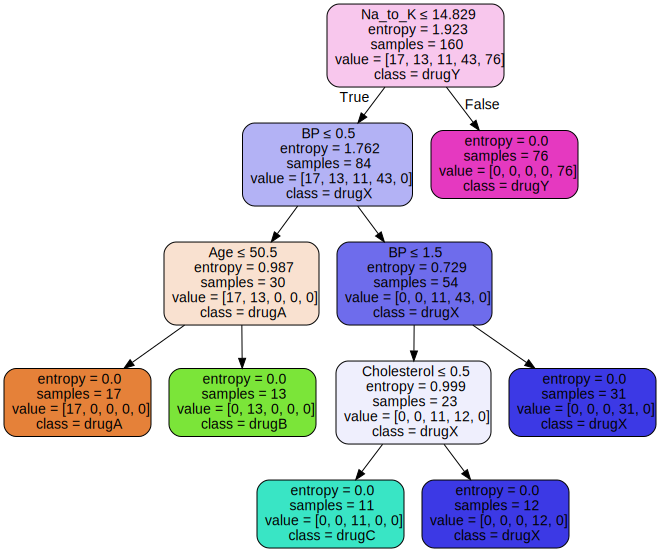

In [ ]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(Tree,out_file=None,feature_names=X_train.columns,
                              class_names=np.unique(y_train),filled=True,rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=8, random_state=1, shuffle=True)
scores = cross_val_score(Tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy scores of each fold: ', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy scores of each fold:  [1.   1.   0.96 0.96 1.   1.   1.   1.  ]
Accuracy: 0.990 (0.017)


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.33518601190476177


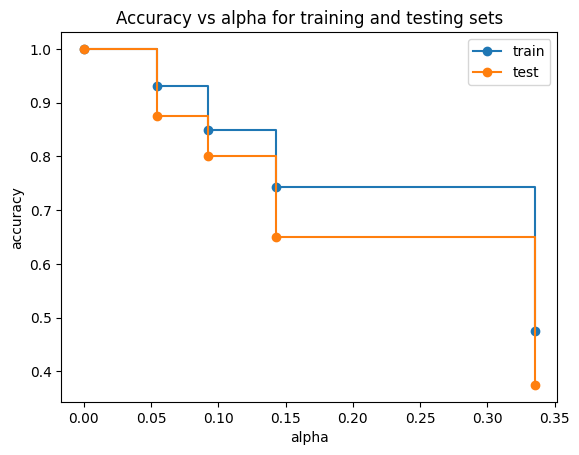

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
Tree_prun=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.075)
Tree_prun.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.075, criterion='entropy')

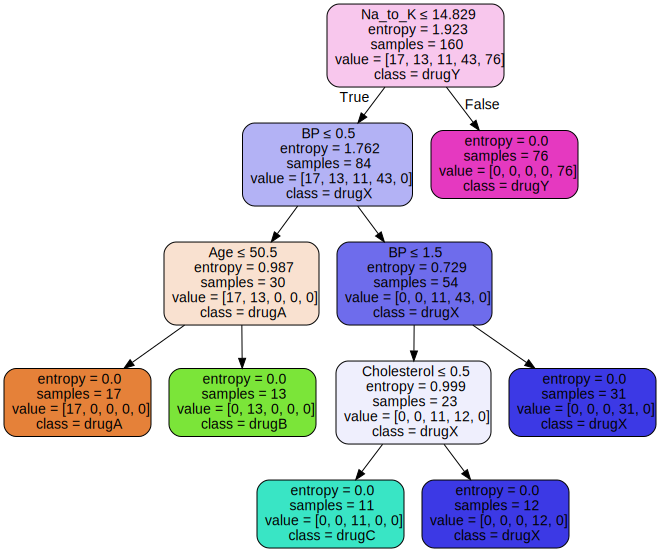

In [ ]:
import graphviz
dot_data=tree.export_graphviz(Tree_prun,out_file=None,feature_names=X_train.columns,
                              class_names=np.unique(y_train),filled=True,rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train.shape, X_test.shape

((180, 5), (20, 5))

In [ ]:
print(X_train)

     Age  Sex  BP  Cholesterol  Na_to_K
124   53    0   0            1   12.495
16    69    1   1            1   11.455
148   61    0   1            1    7.340
93    42    0   1            1   29.271
65    68    0   2            1   27.050
..   ...  ...  ..          ...      ...
106   22    1   2            0   11.953
14    50    0   2            0   12.703
92    29    0   0            0   29.450
179   67    0   2            0   15.891
102   28    0   1            0   13.127

[180 rows x 5 columns]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predTree_train=Tree.predict(X_train)
hasil_train=pd.DataFrame ({'Predicted_risk': predTree_train,'Actual_risk': y_train})
print(hasil_train)

    Predicted_risk Actual_risk
124          drugB       drugB
16           drugX       drugX
148          drugX       drugX
93           drugY       drugY
65           drugY       drugY
..             ...         ...
106          drugX       drugX
14           drugX       drugX
92           drugY       drugY
179          drugY       drugY
102          drugC       drugC

[180 rows x 2 columns]


In [ ]:
predTree_test=Tree.predict(X_test)
hasil_test=pd.DataFrame ({'Predicted_risk': predTree_test,'Actual_risk': y_test})
print(hasil_test)

    Predicted_risk Actual_risk
95           drugX       drugX
15           drugY       drugY
30           drugX       drugX
158          drugC       drugC
128          drugY       drugY
115          drugY       drugY
69           drugY       drugY
170          drugX       drugX
174          drugA       drugA
45           drugX       drugX
66           drugA       drugA
182          drugX       drugX
165          drugY       drugY
78           drugA       drugA
186          drugB       drugB
177          drugY       drugY
56           drugB       drugB
152          drugX       drugX
82           drugC       drugC
68           drugY       drugY


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnfMatrix_train=confusion_matrix(y_train,predTree_train)
print('Decision Trees Accuracy:',metrics.accuracy_score(y_train,predTree_train))
cnfMatrix_train

Decision Trees Accuracy: 1.0


array([[20,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  0, 14,  0,  0],
       [ 0,  0,  0, 48,  0],
       [ 0,  0,  0,  0, 84]])

In [ ]:
cnfMatrix_test=confusion_matrix(y_test,predTree_test)
print('Decision Trees Accuracy:',metrics.accuracy_score(y_test,predTree_test))
cnfMatrix_test

Decision Trees Accuracy: 1.0


array([[3, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 6, 0],
       [0, 0, 0, 0, 7]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predTree_train))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        20
       drugB       1.00      1.00      1.00        14
       drugC       1.00      1.00      1.00        14
       drugX       1.00      1.00      1.00        48
       drugY       1.00      1.00      1.00        84

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [ ]:
print(classification_report(y_test, predTree_test))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         6
       drugY       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree

<Figure size 1200x800 with 0 Axes>

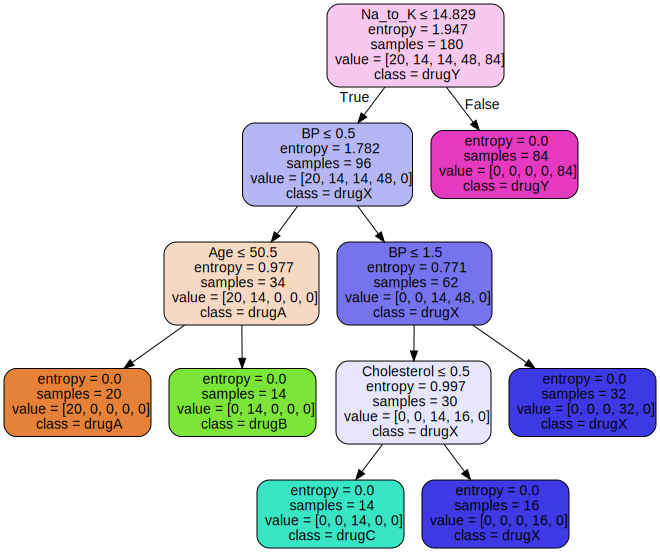

In [ ]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(Tree,out_file=None,feature_names=X_train.columns,
                              class_names=np.unique(y_train),filled=True,rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=8, random_state=1, shuffle=True)
scores = cross_val_score(Tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy scores of each fold: ', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy scores of each fold:  [1.   1.   0.96 0.96 1.   1.   1.   1.  ]
Accuracy: 0.990 (0.017)


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.33249999999999996


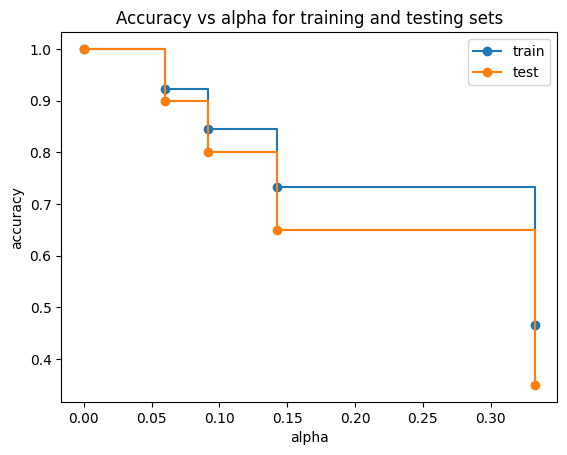

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
Tree_prun=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.075)
Tree_prun.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.075, criterion='entropy')

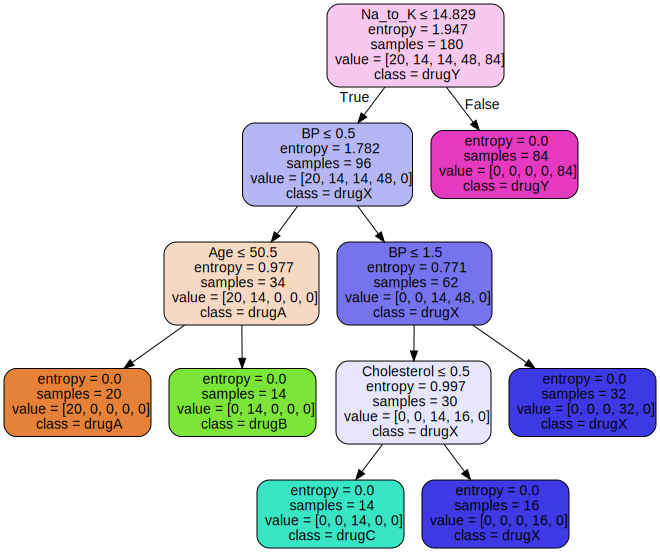

In [ ]:
import graphviz
dot_data=tree.export_graphviz(Tree_prun,out_file=None,feature_names=X_train.columns,
                              class_names=np.unique(y_train),filled=True,rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph